In [4]:
from sklearn.datasets import load_breast_cancer,load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading Dataset
cancer= load_breast_cancer()
df_cancer=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df_cancer["result"]=cancer.target

#cancer
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Data Preprocessing

In [7]:
df_cancer.shape


(569, 31)

In [8]:
  df_cancer.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [9]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df_cancer.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
result                     0
dtype: int64

# **Handling Class Imbalance**

<Axes: xlabel='result', ylabel='count'>

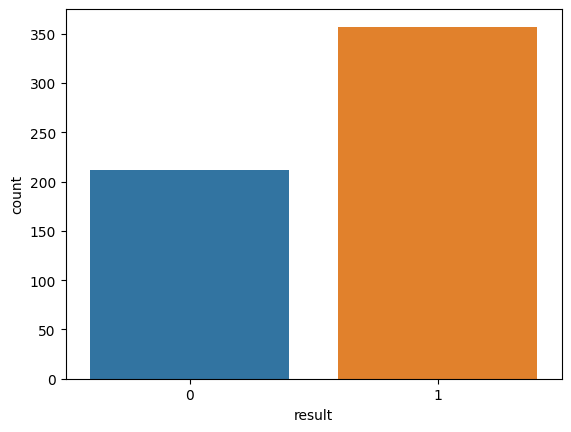

In [11]:
#checking output is balanced or not because of equal importance to both outputs
import seaborn as sns
sns.countplot(x='result',data=df_cancer )

In [12]:
df_cancer[(df_cancer['result']==0)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [13]:
#handlin imbalanced dataset
from sklearn.utils import resample

minority_cls=df_cancer[(df_cancer['result']==0)]
majority_cls=df_cancer[(df_cancer['result']==1)]

#upsample minority class
minority_cls_unsampled=resample(minority_cls,replace=True,n_samples=340,random_state=0)
df_resampled=pd.concat([minority_cls_unsampled,majority_cls])
df_resampled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,28.74,172.00,2081.0,0.15020,0.57170,0.7053,0.24220,0.3828,0.10070,0
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,29.51,119.10,959.5,0.16400,0.62470,0.6922,0.17850,0.2844,0.11320,0
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,...,30.15,105.30,706.0,0.17770,0.53430,0.6282,0.19770,0.3407,0.12430,0
492,18.01,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,26.06,143.40,1426.0,0.13090,0.23270,0.2544,0.14890,0.3251,0.07625,0
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.69970,0.9608,0.29100,0.4055,0.09789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,1
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1


# Splitting Data

In [14]:
#splitting Data
X_cancer=df_resampled.drop(['result'],axis='columns',inplace=False)
Y_cancer=df_resampled['result']
X_cancer.shape

(697, 30)

# Feature Selection

In [15]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
feature=SelectKBest(k=10)
f=feature.fit(X_cancer,Y_cancer)
f.scores_

array([7.68136558e+02, 1.69468408e+02, 8.32112810e+02, 6.62436903e+02,
       1.06070246e+02, 3.58205169e+02, 5.83562112e+02, 9.52468388e+02,
       8.25626555e+01, 1.81283367e-01, 2.91017857e+02, 5.73137008e-01,
       2.72729102e+02, 2.72245093e+02, 1.19247180e+00, 7.52757871e+01,
       5.76638610e+01, 1.59652354e+02, 1.90630264e-03, 5.31715731e+00,
       9.55029900e+02, 1.96972338e+02, 9.87494004e+02, 6.98665585e+02,
       1.82081170e+02, 3.48058389e+02, 5.40905977e+02, 1.23518917e+03,
       1.38143822e+02, 7.92424369e+01])

In [16]:
f_scores=pd.DataFrame(f.scores_,columns=['scores'])
f_scores['features']=X_cancer.columns
i1=f_scores.nlargest(columns=['scores'],n=20)
i1

,scores,features
27,1235.189172,worst concave points
22,987.494004,worst perimeter
20,955.029900,worst radius
7,952.468388,mean concave points
2,832.112810,mean perimeter
0,768.136558,mean radius
23,698.665585,worst area
3,662.436903,mean area
6,583.562112,mean concavity
26,540.905977,worst concavity


In [17]:
from sklearn.ensemble import ExtraTreesClassifier
method=ExtraTreesClassifier()
f2=method.fit(X_cancer,Y_cancer)
f2.feature_importances_

array([0.03940274, 0.02829665, 0.0689435 , 0.04178049, 0.01178798,
       0.01771573, 0.0752651 , 0.0792021 , 0.00639474, 0.00613654,
       0.02350359, 0.00536571, 0.01794652, 0.0248053 , 0.00690518,
       0.00767916, 0.00884114, 0.01050439, 0.00589111, 0.00660579,
       0.05072994, 0.03163435, 0.09081081, 0.07304508, 0.02490942,
       0.02470264, 0.04096901, 0.13790982, 0.02253132, 0.00978417])

In [18]:
f2_scores=pd.DataFrame(f2.feature_importances_,columns=['scores'])
f2_scores['features']=X_cancer.columns
i2=f2_scores.nlargest(n=20,columns=['scores'])
i2

,scores,features
27,0.137910,worst concave points
22,0.090811,worst perimeter
7,0.079202,mean concave points
6,0.075265,mean concavity
23,0.073045,worst area
2,0.068944,mean perimeter
20,0.050730,worst radius
3,0.041780,mean area
26,0.040969,worst concavity
0,0.039403,mean radius


<Axes: xlabel='scores', ylabel='features'>

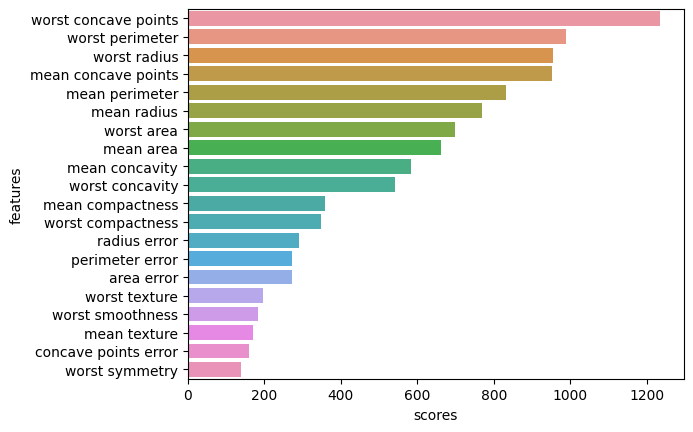

In [19]:
import seaborn as sns
sns.barplot(x=i1['scores'],y=i1['features'])

<Axes: xlabel='scores', ylabel='features'>

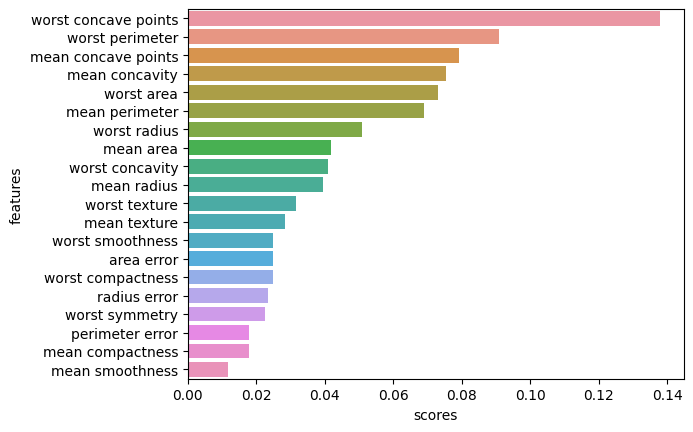

In [20]:
sns.barplot(x=i2['scores'],y=i2['features'])

# Correlation

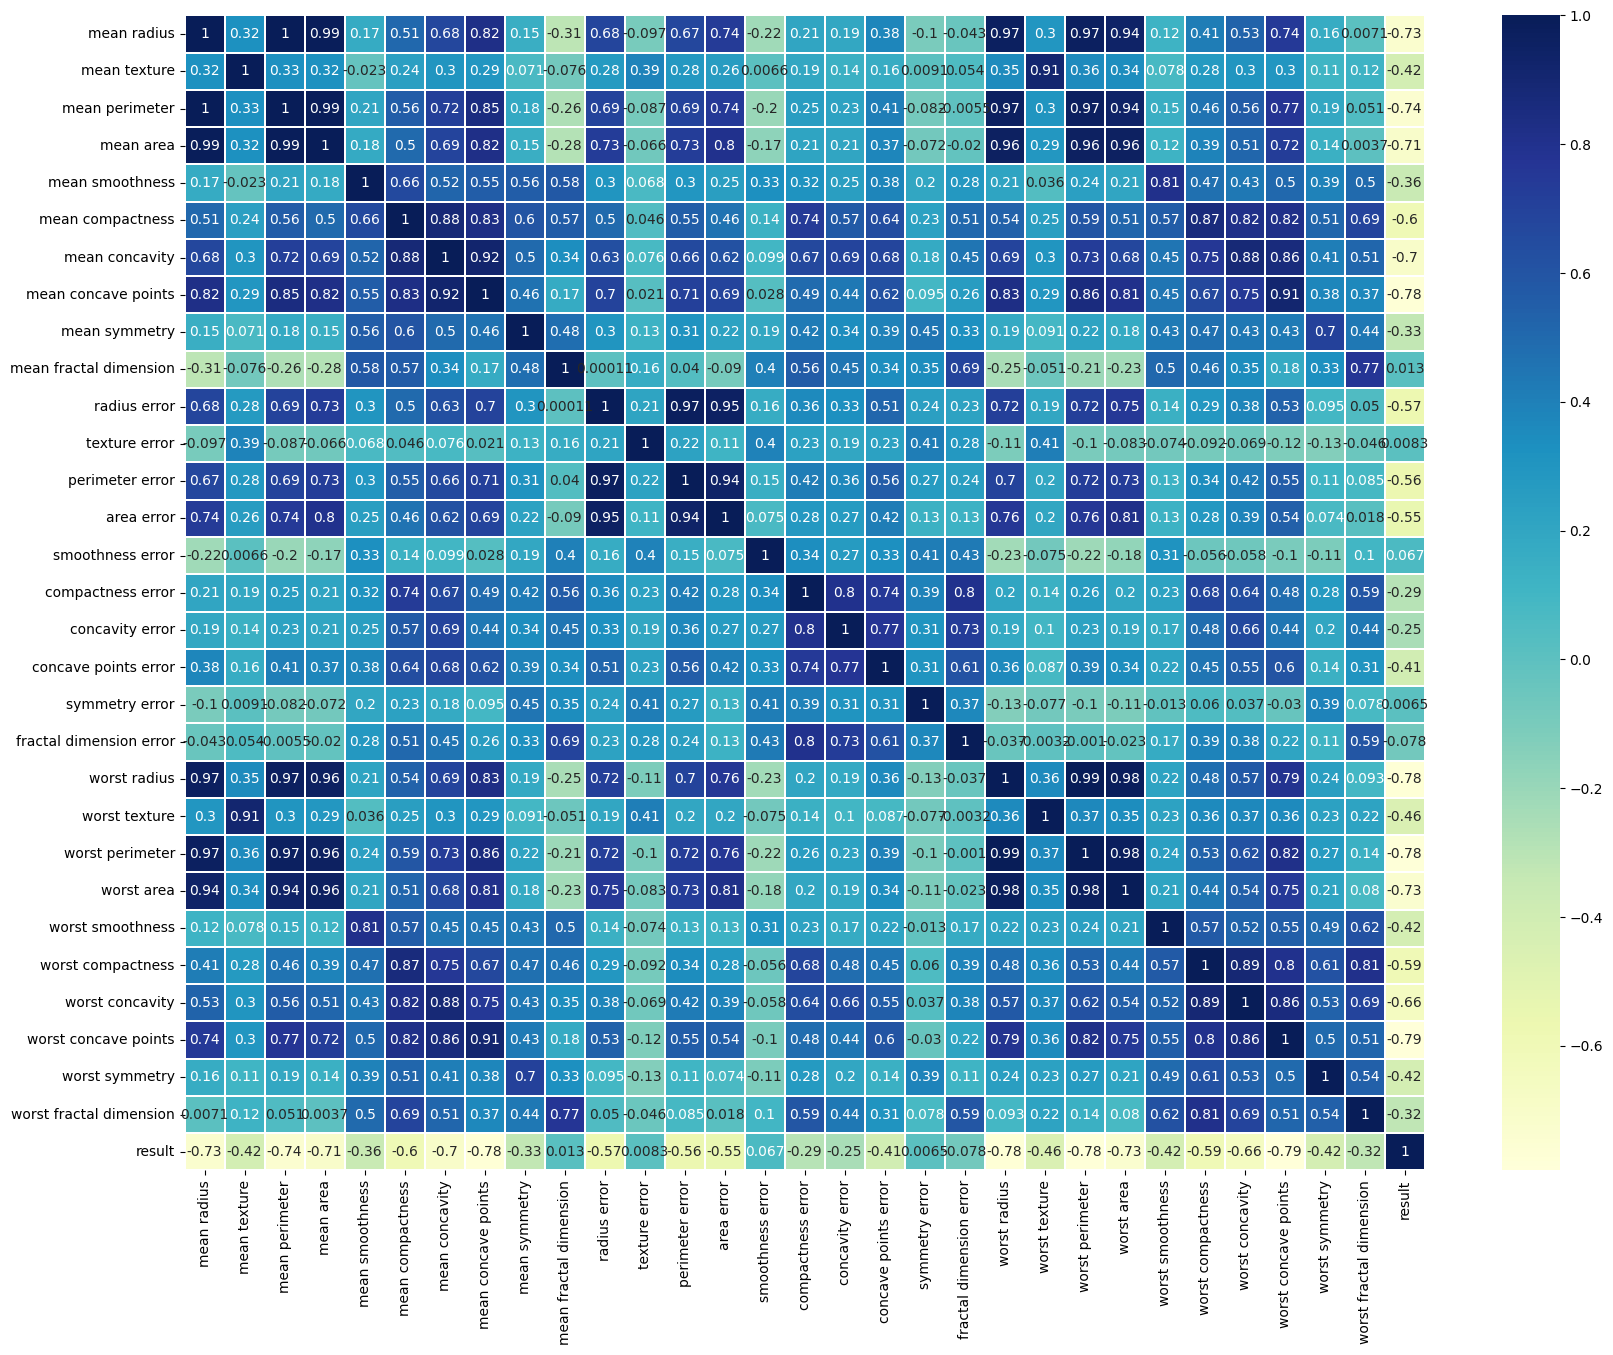

In [21]:
corr_mat=df_cancer.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,cbar=True,annot=True,linewidths=.25,cmap="YlGnBu")
plt.show()

In [22]:
col = []
for i in i1['features']:
  for j in i2['features']:
    if i in j:
      print(i)
      col.append(i)
col

worst concave points
worst perimeter
worst radius
mean concave points
mean perimeter
mean radius
worst area
mean area
mean concavity
worst concavity
mean compactness
worst compactness
radius error
perimeter error
area error
worst texture
worst smoothness
mean texture
worst symmetry


['worst concave points',
 'worst perimeter',
 'worst radius',
 'mean concave points',
 'mean perimeter',
 'mean radius',
 'worst area',
 'mean area',
 'mean concavity',
 'worst concavity',
 'mean compactness',
 'worst compactness',
 'radius error',
 'perimeter error',
 'area error',
 'worst texture',
 'worst smoothness',
 'mean texture',
 'worst symmetry']

In [23]:
X_cancer_final=pd.DataFrame(data=df_resampled[col])
X_cancer_final.shape

(697, 19)

In [24]:
X_cancer_final.isna().sum()

worst concave points    0
worst perimeter         0
worst radius            0
mean concave points     0
mean perimeter          0
mean radius             0
worst area              0
mean area               0
mean concavity          0
worst concavity         0
mean compactness        0
worst compactness       0
radius error            0
perimeter error         0
area error              0
worst texture           0
worst smoothness        0
mean texture            0
worst symmetry          0
dtype: int64

In [25]:
Y_cancer

393    0
62     0
229    0
492    0
108    0
      ..
558    1
559    1
560    1
561    1
568    1
Name: result, Length: 697, dtype: int64

In [26]:
X_cancer_final.shape


(697, 19)

In [27]:
Y_cancer.shape

(697,)

# Splitting Train Data and Test Data

In [28]:
#splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer_final,Y_cancer, test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((557, 19), (140, 19))

# Feature Sampling

In [29]:
#feature Sampling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train,X_test

(array([[ 0.8292208 ,  0.66154641,  0.7549118 , ...,  1.20773283,
          0.99515697,  0.77303814],
        [-0.32525429, -0.70381848, -0.67676291, ...,  0.54973345,
         -0.8907009 ,  0.56188354],
        [ 1.18096353, -0.29989683, -0.28976961, ...,  1.87008981,
         -0.2652405 ,  1.29388616],
        ...,
        [-0.78193603, -0.89928306, -0.94545257, ..., -0.02111369,
         -1.22949195, -0.0560956 ],
        [-0.88921026, -1.15364687, -1.14997752, ..., -0.06033219,
         -1.79098481, -0.06172639],
        [-1.86650043, -1.12910553, -1.09383342, ..., -1.55063541,
          0.40286493, -0.73601342]]),
 array([[-0.30628061, -0.29123518, -0.2637027 , ..., -0.04290174,
         -1.37401121, -0.52767422],
        [ 0.36655506,  0.13029849,  0.19748103, ...,  0.14011795,
          0.53080001, -0.4305431 ],
        [-0.6539367 , -0.2103931 , -0.13737847, ..., -0.57017277,
         -0.50215732,  0.87157695],
        ...,
        [ 0.47893759, -0.22194197, -0.1774814 , ...,  

# Model Building

In [30]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [31]:
models={
    'logistic_reg':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,3,5,10],
            'solver':['lbfgs','liblinear'],
            'random_state':[0]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':["gini","entropy"],
            'splitter':["best","random"],
            'random_state':[0]
        }
    },
    'KNN':
    {
        'model':KNeighborsClassifier(),
        'params':{
            "n_neighbors":[5,10,15],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'p':[1,2]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,150,200],
            'criterion':["gini","entropy","log_loss"],
            'max_depth':[1,5,10,15],
            'random_state':[0]
        }
    }


}

# HyperParameter Tuning




In [32]:
from sklearn.model_selection import GridSearchCV

In [42]:
scores=[]
for model,model_params in models.items():
  gscv=GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=False)
  gscv.fit(X_train,y_train)
  scores.append({
      'model':model,
      'parameters':gscv.best_params_,
      'scores':gscv.best_score_
  })
  scores

In [38]:
df_scores=pd.DataFrame(data=scores,columns=['model','parameters','scores'])
df_scores


,model,parameters,scores
0,logistic_reg,"{'C': 10, 'random_state': 0, 'solver': 'lbfgs'}",0.978459
1,decision_tree,"{'criterion': 'gini', 'random_state': 0, 'spli...",0.964077
2,KNN,"{'algorithm': 'auto', 'n_neighbors': 10, 'p': 2}",0.965862
3,random_forest,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.976641


# Cross Validation

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
clf_model=LogisticRegression(C=3,solver='lbfgs',random_state=0)
clf=cross_val_score(clf_model,X_train,y_train,cv=5)
np.mean(clf)


0.9730534105534104

# Model Training

In [46]:
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(C=3,solver='lbfgs',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.95

# Model Evaluation

In [47]:
from sklearn.metrics import confusion_matrix,classification_report


<Axes: >

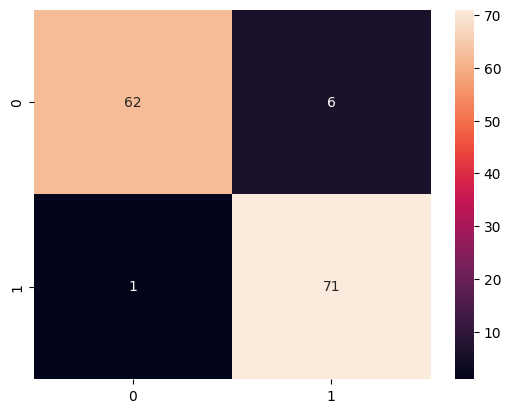

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        68
           1       0.92      0.99      0.95        72

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



# Model Saving

In [51]:
import pickle

In [52]:
with open("breast_cancer2.pkl",'wb') as f:
  pickle.dump(classifier,f)

# Model Loading

In [53]:
with open("breast_cancer2.pkl",'rb') as f:
  model=pickle.load(f)

# Model Testing

In [56]:
data = [0.2654,184.60,0.14710,14.000,18.23,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220]
data_arr=np.array([data])
data_arr.shape

(1, 19)

In [57]:
pred_df=pd.DataFrame(data=data_arr,columns=col)
pred_df

,worst concave points,worst perimeter,worst radius,mean concave points,mean perimeter,mean radius,worst area,mean area,mean concavity,worst concavity,mean compactness,worst compactness,radius error,perimeter error,area error,worst texture,worst smoothness,mean texture,worst symmetry
0,0.2654,184.6,0.1471,14.0,18.23,25.38,122.8,2019.0,17.99,1001.0,0.3001,0.7119,0.2776,0.6656,1.095,8.589,153.4,17.33,0.1622


In [58]:
model.predict(data_arr)

array([0])

In [63]:
def generate_chat_response(prediction):
  if prediction.lower()=='malignant':
    response="Based on the available data,your breast cancer prediction is maglinant.Malignant tumors are cancerous and can spread cancer cells throughout one's body through the blood or lymphatic system, a process known as metastasis. Cancer that begins in bone is called primary bone cancer."

  elif prediction.lower()=='benign':
    response="Based on the available data,your breast cancer prediction is benign.A benign tumor is an abnormal but noncancerous collection of cells also called a benign neoplasm. Benign tumors can form anywhere on or in your body, but many don't need treatment. "

  else:
    response="I'm sorry,but I couldn't determine the nature of your breast cancer prediction based on the provided information"


# Prediction

In [66]:
op=model.predict(pred_df)
prediction=''
if op==1:
   prediction='Malignant'
   print('Malignant')
   chat_response=generate_chat_response(prediction)
   print("Response:",chat_response)
else:
   prediction = 'Benign'
   print("Benign")
   chat_response=generate_chat_response(prediction)
   print("Response:",chat_response)

Benign
Response: None
